## DESKRIPSI

Data yang di gunakan adalah data yang berisi informasi tentang tibgjat kematian buuhdiri di US daritahun 1950 hingga 2018. Data tersebut berisikan beberapa variabel :

1. INDICATOR (Indikator)
Variabel ini menunjukkan jenis data yang dikumpulkan >>> "Death rates for suicide" (Tingkat Kematian Bunuh Diri)

2. UNIT (Satuan)
Variabel ini menunjukkan satuan pengukuran untuk data >>> "Deaths per 100|000 resident population" (Kematian per 100000 penduduk)

3. UNIT_NUM (Nomor Satuan)
Variabel ini menunjukkan nomor unik untuk satuan pengukuran >>> "age-adjusted" (disesuaikan dengan usia) atau "crude" (mentah)

4. STUB_NAME (Nama Stub)
Variabel ini menunjukkan kategori utama untuk data >>> "Total" (Total), "Sex" (Jenis Kelamin), "Sex and race" (Jenis Kelamin dan Ras), "Sex and race and Hispanic origin" (Jenis Kelamin, Ras, dan Asal Usul Hispanik), "Sex and race (Single race)" (Jenis Kelamin dan Ras (Ras Tunggal)), "Sex and race and Hispanic origin (Single race)" (Jenis Kelamin, Ras, dan Asal Usul Hispanik (Ras Tunggal)), "Age" (Usia), "Sex and age" (Jenis Kelamin dan Usia), "Sex| age and race" (Jenis Kelamin, Usia, dan Ras), dan "Sex| age and race and Hispanic origin" (Jenis Kelamin, Usia, Ras, dan Asal Usul Hispanik)

5. STUB_NAME_NUM (Nomor Nama Stub)
Variabel ini menunjukkan nomor unik untuk kategori utama >>> nomornya adalah : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

6. STUB_LABEL (Label Stub)
Variabel ini memberikan deskripsi lebih detail untuk kategori utama >>> Misalnya, jika STUB_NAME adalah "Sex", STUB_LABEL bisa "Male" (Pria) atau "Female" (Wanita)

7. STUB_LABEL_NUM (Nomor Label Stub)
Variabel ini menunjukkan nomor unik untuk deskripsi kategori utama >>> Misalnya, jika STUB_LABEL adalah "Male" (Pria), STUB_LABEL_NUM bisa "02.01"

8. YEAR (Tahun)
Variabel ini menunjukkan tahun ketika data dikumpulkan >>> Rentang waktu dari tahun 1950 hingga 2018

9. YEAR_NUM (Nomor Tahun)
Variabel ini menunjukkan nomor unik untuk tahun >>> Misalnya, tahun 1950 memiliki nomor 1, tahun 1960 memiliki nomor 2, dan seterusnya

10. AGE (Usia)
Variabel ini menunjukkan kelompok usia untuk data >>> "All ages" (Semua Usia), "10-14 years" (10-14 Tahun), "15-19 years" (15-19 Tahun), "20-24 years" (20-24 Tahun), "25-34 years" (25-34 Tahun), "35-44 years" (35-44 Tahun), "45-54 years" (45-54 Tahun), "55-64 years" (55-64 Tahun), "65-74 years" (65-74 Tahun), "75 years and over" (75 Tahun dan Lebih)

11. AGE_NUM (Nomor Usia)
Variabel ini menunjukkan nomor unik untuk kelompok usia >>> "All ages" (Semua Usia) memiliki nomor 0, "10-14 years" (10-14 Tahun) memiliki nomor 1, "15-19 years" (15-19 Tahun) memiliki nomor 2, dan seterusnya

12. ESTIMATE (Estimasi)
Variabel ini menunjukkan tingkat kematian bunuh diri per 100.000 penduduk untuk setiap kategori

Data ini dapat digunakan untuk menganalisis tren tingkat kematian bunuh diri dari waktu ke waktu dan bagaimana tingkat tersebut bervariasi berdasarkan faktor demografis seperti jenis kelamin, ras, dan usia.

Data ini dapat digunakan untuk menganalisis tren tingkat kematian bunuh diri dari waktu ke waktu dan bagaimana tingkat tersebut bervariasi berdasarkan faktor demografis seperti jenis kelamin, ras, dan usia.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                            AdaBoostClassifier, GradientBoostingClassifier

plt.rcParams['figure.figsize'] = (10
                                  , 7)

In [12]:
df = pd.read_csv("DEATH.csv", sep=";")
df

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2016,40,All ages,0,"0,545138889"
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2017,41,All ages,0,14
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2018,42,All ages,0,"0,584722222"
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2016,40,All ages,0,"0,877777778"
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2017,41,All ages,0,"0,919444444"
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and race and Hispanic origin (Single race),10,Female: Not Hispanic or Latino: Black or Afric...,"0,265277778",2018,42,All ages,0,"0,089583333"
596,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and race and Hispanic origin (Single race),10,Female: Hispanic or Latino: All races,"0,265972222",2018,42,All ages,0,"0,088888889"
597,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and race and Hispanic origin (Single race),10,Female: Not Hispanic or Latino: American India...,"0,266666667",2018,42,All ages,0,"0,459027778"
598,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and race and Hispanic origin (Single race),10,Female: Not Hispanic or Latino: Asian,"0,268055556",2018,42,All ages,0,4


In [15]:
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2016,40,All ages,0,"0,545138889"
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2017,41,All ages,0,14
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2018,42,All ages,0,"0,584722222"
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2016,40,All ages,0,"0,877777778"
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2017,41,All ages,0,"0,919444444"


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INDICATOR       600 non-null    object
 1   UNIT            600 non-null    object
 2   UNIT_NUM        600 non-null    int64 
 3   STUB_NAME       600 non-null    object
 4   STUB_NAME_NUM   600 non-null    int64 
 5   STUB_LABEL      600 non-null    object
 6   STUB_LABEL_NUM  600 non-null    object
 7   YEAR            600 non-null    int64 
 8   YEAR_NUM        600 non-null    int64 
 9   AGE             600 non-null    object
 10  AGE_NUM         600 non-null    int64 
 11  ESTIMATE        576 non-null    object
dtypes: int64(5), object(7)
memory usage: 56.4+ KB


In [386]:
np.sum(df.isnull())

INDICATOR          0
UNIT               0
UNIT_NUM           0
STUB_NAME          0
STUB_NAME_NUM      0
STUB_LABEL         0
STUB_LABEL_NUM     0
YEAR               0
YEAR_NUM           0
AGE                0
AGE_NUM            0
ESTIMATE          24
dtype: int64

In [388]:
df.loc[:, 'ESTIMATE'].fillna("None", inplace=True)

In [390]:
np.sum(df.isnull())

INDICATOR         0
UNIT              0
UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
ESTIMATE          0
dtype: int64

In [392]:
datacopy=df.copy()

# MEMBUAT DUMMY PADA DATA

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INDICATOR       600 non-null    object
 1   UNIT            600 non-null    object
 2   UNIT_NUM        600 non-null    int64 
 3   STUB_NAME       600 non-null    object
 4   STUB_NAME_NUM   600 non-null    int64 
 5   STUB_LABEL      600 non-null    object
 6   STUB_LABEL_NUM  600 non-null    object
 7   YEAR            600 non-null    int64 
 8   YEAR_NUM        600 non-null    int64 
 9   AGE             600 non-null    object
 10  AGE_NUM         600 non-null    int64 
 11  ESTIMATE        600 non-null    object
dtypes: int64(5), object(7)
memory usage: 56.4+ KB


In [396]:
from sklearn.preprocessing import LabelEncoder

In [398]:
var_kategori = ['INDICATOR','UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM','STUB_LABEL','STUB_LABEL_NUM','YEAR','YEAR_NUM', 'AGE', 'AGE_NUM', 'ESTIMATE']
for feature in var_kategori:
        if feature in df.columns.values:
            df[feature] = LabelEncoder().fit_transform(df[feature])
            df[feature] = df[feature].astype('category')

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INDICATOR       600 non-null    category
 1   UNIT            600 non-null    category
 2   UNIT_NUM        600 non-null    category
 3   STUB_NAME       600 non-null    category
 4   STUB_NAME_NUM   600 non-null    category
 5   STUB_LABEL      600 non-null    category
 6   STUB_LABEL_NUM  600 non-null    category
 7   YEAR            600 non-null    category
 8   YEAR_NUM        600 non-null    category
 9   AGE             600 non-null    category
 10  AGE_NUM         600 non-null    category
 11  ESTIMATE        600 non-null    category
dtypes: category(12)
memory usage: 25.5 KB


In [402]:
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,0,0,0,11,0,14,0,0,0,14,0,94
1,0,0,0,11,0,14,0,1,1,14,0,237
2,0,0,0,11,0,14,0,2,2,14,0,97
3,0,0,0,1,2,85,15,0,0,14,0,142
4,0,0,0,1,2,85,15,1,1,14,0,145


## Box Plot

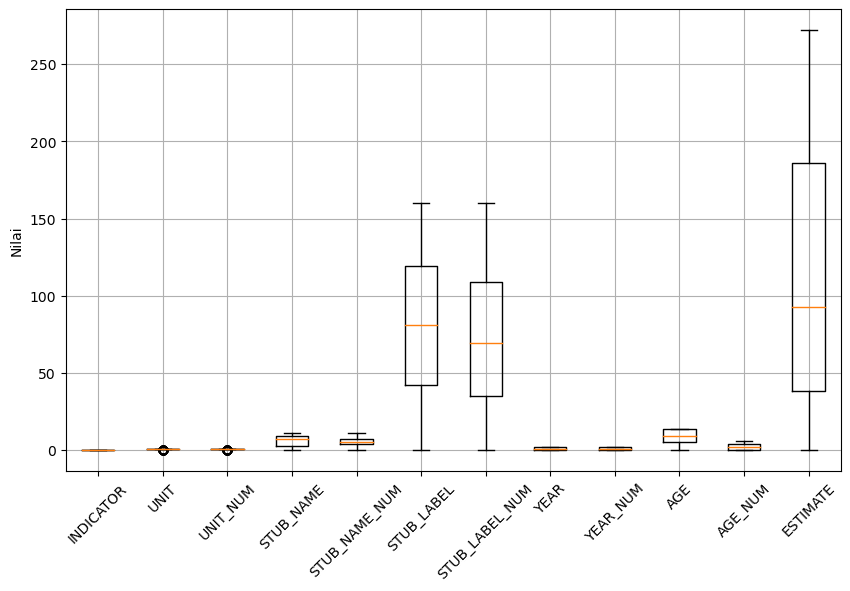

In [404]:
data_to_plot = [df['INDICATOR'], df['UNIT'], df['UNIT_NUM'], df['STUB_NAME'], df['STUB_NAME_NUM'], df['STUB_LABEL'], df['STUB_LABEL_NUM'], df['YEAR'], df['YEAR_NUM'], df['AGE'], df['AGE_NUM'], df['ESTIMATE']]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot)
plt.xticks(range(1, len(data_to_plot) + 1), ['INDICATOR','UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM','STUB_LABEL','STUB_LABEL_NUM','YEAR','YEAR_NUM', 'AGE', 'AGE_NUM', 'ESTIMATE'], rotation=45)
plt.ylabel('Nilai')
plt.grid(True)

plt.show()

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INDICATOR       600 non-null    category
 1   UNIT            600 non-null    category
 2   UNIT_NUM        600 non-null    category
 3   STUB_NAME       600 non-null    category
 4   STUB_NAME_NUM   600 non-null    category
 5   STUB_LABEL      600 non-null    category
 6   STUB_LABEL_NUM  600 non-null    category
 7   YEAR            600 non-null    category
 8   YEAR_NUM        600 non-null    category
 9   AGE             600 non-null    category
 10  AGE_NUM         600 non-null    category
 11  ESTIMATE        600 non-null    category
dtypes: category(12)
memory usage: 25.5 KB


In [47]:
df_grouped.fillna(0)

AGE,10-14 years,15-19 years,15-24 years,20-24 years,25-34 years,25-44 years,35-44 years,45-54 years,45-64 years,55-64 years,65 years and over,65-74 years,75-84 years,85 years and over
YEAR,,,,,,,,,,,,,,
2016,"0,0868055560,046527778","0,5888888895","0,8368055560,211111111","1,0479166670,213888889","260,254861111","1,0847222220,295833333","1,0854166670,336805556","1,2111111110,41875","1,2090277780,38125","1,1715277780,377777778","310,210416667","1,0479166670,251388889","360,170138889","480,128472222"
2017,"0,1270833330,046527778","0,7145833330,211111111","0,9215277780,213888889","1,1263888890,251388889","1,1291666670,293055556","1,1284722220,297222222","1,1284722220,336805556","1,2520833330,419444444","1,2506944440,379861111","1,2138888890,339583333","1,2944444440,209722222","1,0847222220,251388889","1,4638888890,16875","2,08750,128472222"
2018,"0,1298611112","0,7104166670,209722222","0,9215277780,213888889","1,131250,252777778","1,1277777780,294444444","1,1298611110,297916667","1,1673611110,336111111","1,2513888890,418055556","310,380555556","1,2965277780,378472222","1,3368055560,209722222","1,1305555560,251388889","1,5444444440,168055556","1,9597222220,129166667"


## Bar Chart

## Line Chart

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INDICATOR       600 non-null    object
 1   UNIT            600 non-null    object
 2   UNIT_NUM        600 non-null    int64 
 3   STUB_NAME       600 non-null    object
 4   STUB_NAME_NUM   600 non-null    int64 
 5   STUB_LABEL      600 non-null    object
 6   STUB_LABEL_NUM  600 non-null    object
 7   YEAR            600 non-null    int64 
 8   YEAR_NUM        600 non-null    int64 
 9   AGE             600 non-null    object
 10  AGE_NUM         600 non-null    int64 
 11  ESTIMATE        576 non-null    object
dtypes: int64(5), object(7)
memory usage: 56.4+ KB


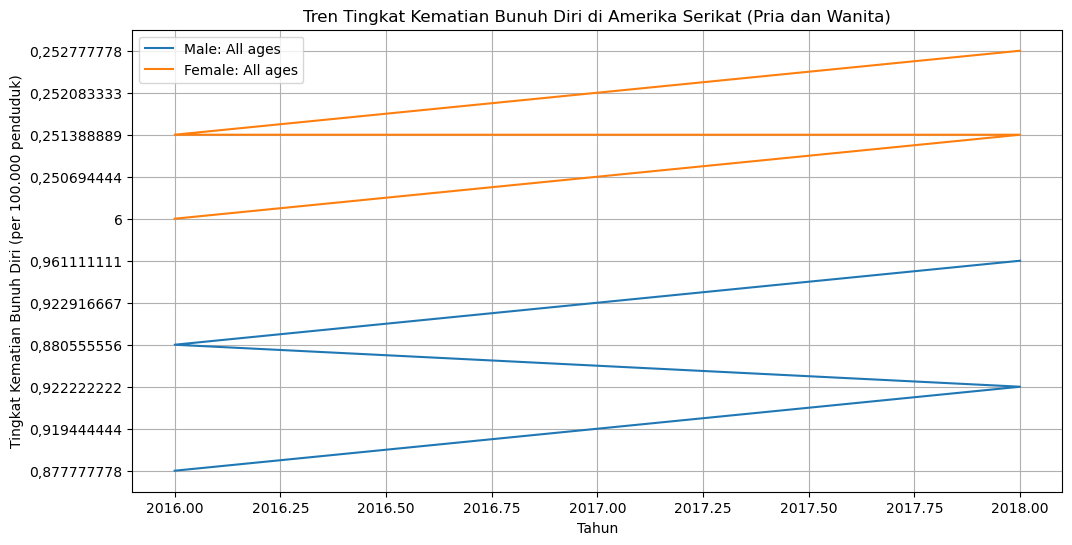

In [26]:
# Membaca data dari file CSV
df = pd.read_csv('DEATH.csv', sep=';')

# Memfilter data untuk kategori yang ingin divisualisasikan
df_filtered = df[df['STUB_LABEL'].isin(['Male', 'Female'])]

# Membuat line chart
plt.figure(figsize=(12, 6))
for sex in df_filtered['STUB_LABEL'].unique():
    for age in df_filtered['AGE'].unique():
        df_subset = df_filtered[(df_filtered['STUB_LABEL'] == sex) & (df_filtered['AGE'] == age)]
        plt.plot(df_subset['YEAR'], df_subset['ESTIMATE'], label=f'{sex}: {age}')

plt.xlabel('Tahun')
plt.ylabel('Tingkat Kematian Bunuh Diri (per 100.000 penduduk)')
plt.title('Tren Tingkat Kematian Bunuh Diri di Amerika Serikat (Pria dan Wanita)')
plt.legend()
plt.grid(True)
plt.show()

## Stacked Bar

In [118]:
# menunjukkan proporsi tingkat kematian bunuh diri di rentan usia sekian pada tahun 2016 dan 2018

<Figure size 1200x600 with 0 Axes>

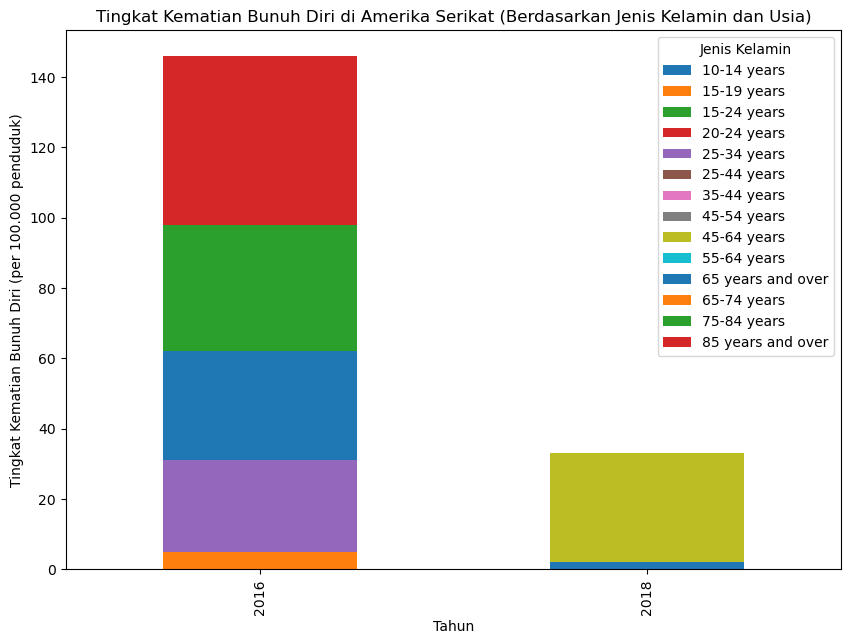

In [24]:
df = pd.read_csv('DEATH.csv', sep=';')

# Memfilter data 
df_filtered = df[df['STUB_NAME'] == 'Sex and age']

# Mengconvert 'ESTIMATE' ke numerik
df_filtered.loc[:, 'ESTIMATE'] = pd.to_numeric(df_filtered['ESTIMATE'], errors='coerce')

# Filter data untuk tahun 2016 dan 2018
df_filtered = df_filtered[df_filtered['YEAR'].isin([2016, 2018])]

df_grouped = df_filtered.groupby(['YEAR', 'AGE'])['ESTIMATE'].sum().unstack()
df_grouped.dropna(inplace=True) 

plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Tahun')
plt.ylabel('Tingkat Kematian Bunuh Diri (per 100.000 penduduk)')
plt.title('Tingkat Kematian Bunuh Diri di Amerika Serikat (Berdasarkan Jenis Kelamin dan Usia)')
plt.legend(title='Jenis Kelamin')
plt.show()

## Scatter Plot

In [22]:
# hubungan antara usia dan tingkat kematian bunuh diri pada tahun 2018

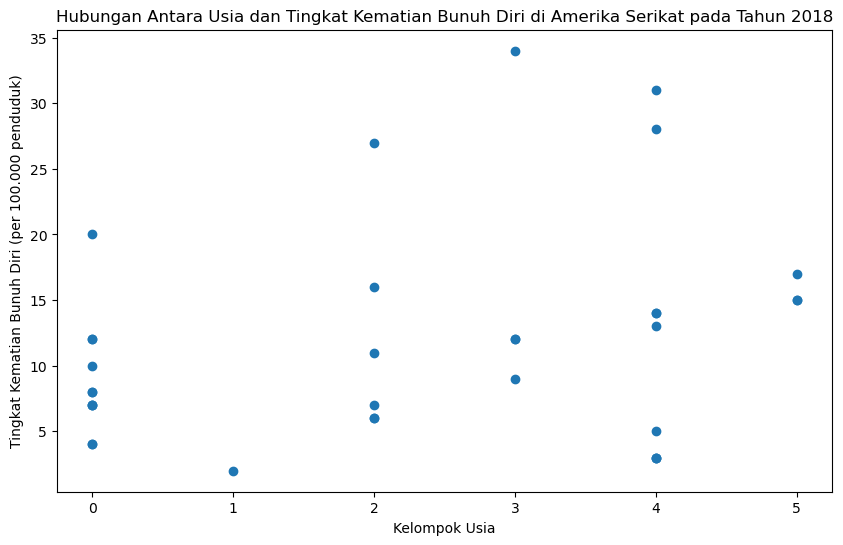

In [20]:
df = pd.read_csv('DEATH.csv', sep=';')

df_filtered = df.copy()
df_filtered.loc[:, 'ESTIMATE'] = pd.to_numeric(df_filtered['ESTIMATE'], errors='coerce')

# memfilter data untuk taun 2018
df_2018 = df_filtered[df_filtered['YEAR'] == 2018]

plt.figure(figsize=(10, 6))
plt.scatter(df_2018['AGE_NUM'], df_2018['ESTIMATE'])
plt.xlabel('Kelompok Usia')
plt.ylabel('Tingkat Kematian Bunuh Diri (per 100.000 penduduk)')
plt.title('Hubungan Antara Usia dan Tingkat Kematian Bunuh Diri di Amerika Serikat pada Tahun 2018')
plt.show()